# Week 1 Submission for NBA career modelling

## Load Required Packages 

In [105]:
import os
import pandas as pd #data manipulation
import numpy as np
import sklearn # models
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
# visualisation inline in notebook

## Import Data 

In [11]:
## Import Data 
data_path = '/Users/james/projects/adsi/group1_nba_career_prediction/data/raw'
train_data = data_path + '/train.csv'
df_train = pd.read_csv(train_data)
df_train

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [33]:
## Set index for df_train
df_train = df_train.set_index('Id')

## Conduct EDA

In [34]:
## Check the type and quality of the data
df_train.info()
## Check the basic description of the data
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 10556 to 2900
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           8000 non-null   int64  
 1   MIN          8000 non-null   float64
 2   PTS          8000 non-null   float64
 3   FGM          8000 non-null   float64
 4   FGA          8000 non-null   float64
 5   FG%          8000 non-null   float64
 6   3P Made      8000 non-null   float64
 7   3PA          8000 non-null   float64
 8   3P%          8000 non-null   float64
 9   FTM          8000 non-null   float64
 10  FTA          8000 non-null   float64
 11  FT%          8000 non-null   float64
 12  OREB         8000 non-null   float64
 13  DREB         8000 non-null   float64
 14  REB          8000 non-null   float64
 15  AST          8000 non-null   float64
 16  STL          8000 non-null   float64
 17  BLK          8000 non-null   float64
 18  TOV          8000 non-null   float64
 19  TA

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,1.392525,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


<AxesSubplot:>

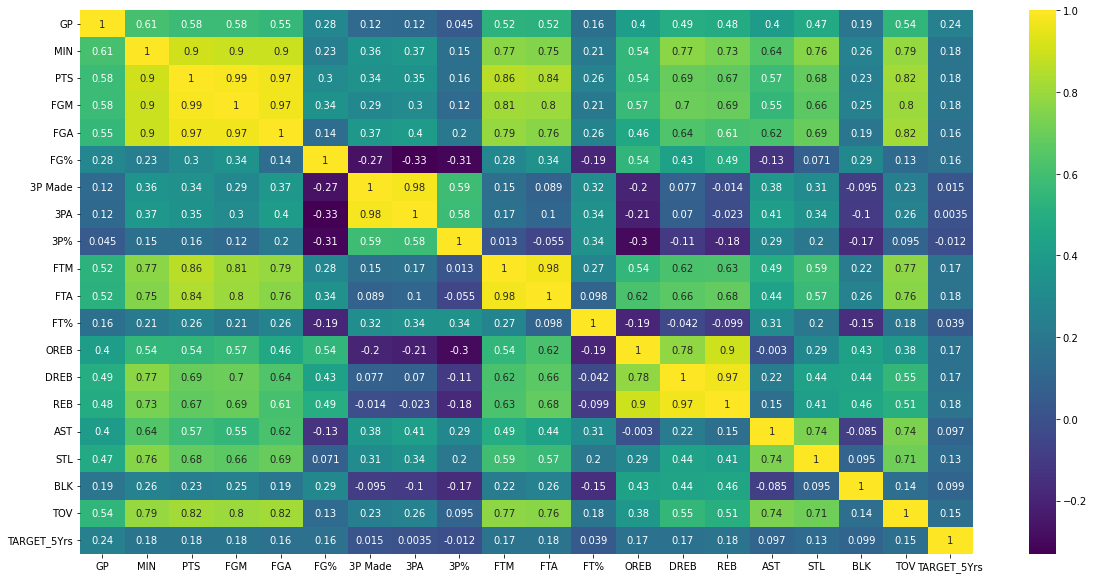

In [35]:
## Check for correlation between values to inform parameter selection for modelling
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),cmap='viridis',annot=True)

## Build an initial model

In [120]:
## Separate the target variable from the rest of the variables
TargetVariable = df_train['TARGET_5Yrs']
print(TargetVariable)
Predictors = df_train.loc[:, ['GP', 'MIN']]
print(Predictors)
X = Predictors.values
y = TargetVariable.values
print(X)
print(y)

Id
10556    1
5342     1
5716     1
13790    1
5470     1
        ..
2996     1
11679    1
5537     1
1292     1
2900     1
Name: TARGET_5Yrs, Length: 8000, dtype: int64
       GP   MIN
Id             
10556  80  24.3
5342   75  21.8
5716   85  19.1
13790  63  19.1
5470   63  17.8
...    ..   ...
2996   32   9.2
11679  54   6.0
5537   85  28.2
1292   39   7.7
2900   49  19.2

[8000 rows x 2 columns]
[[80.  24.3]
 [75.  21.8]
 [85.  19.1]
 ...
 [85.  28.2]
 [39.   7.7]
 [49.  19.2]]
[1 1 1 ... 1 1 1]


In [93]:
## Split the Data into a test/ train set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
## Build the model
from xgboost import XGBClassifier

clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
print(clf)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


In [107]:
## Create a model on the train data

XGB=clf.fit(X_train, y_train)
XGB

## prediction on test data
prediction = XGB.predict(X_test)
prediction

[16:22:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1, 1, 1, ..., 1, 1, 1])

In [108]:
## Measure accuracy of prediction

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.26      0.03      0.06       263
           1       0.84      0.98      0.90      1337

    accuracy                           0.83      1600
   macro avg       0.55      0.51      0.48      1600
weighted avg       0.74      0.83      0.77      1600

[[   9  254]
 [  25 1312]]


In [149]:
Predictors.reset_index(drop=True)

,GP,MIN
0,80,24.3
1,75,21.8
2,85,19.1
3,63,19.1
4,63,17.8
...,...,...
7995,32,9.2
7996,54,6.0
7997,85,28.2
7998,39,7.7


<BarContainer object of 2 artists>

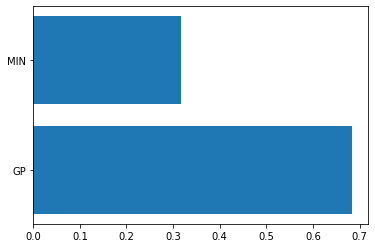

In [154]:
## Plot feature importance 
XGB.feature_importances_
plt.barh(Predictors.reset_index(drop=True).columns, XGB.feature_importances_)


In [152]:
Predictors.columns

Index(['GP', 'MIN'], dtype='object')